# INSTALL DARKNET

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 14730, done.
remote: Total 14730 (delta 0), reused 0 (delta 0), pack-reused 14730
Receiving objects: 100% (14730/14730), 13.27 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (10020/10020), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# DONLOAD PRE_TRAINED WEIGHTS

In [ ]:
!wget https://www.dropbox.com/s/gmw2774nrsw7ovk/yolov3-obj_30000.weights?dl=0 #trained on fish from opendataset

--2021-03-23 13:28:54--  https://www.dropbox.com/s/gmw2774nrsw7ovk/yolov3-obj_30000.weights?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/gmw2774nrsw7ovk/yolov3-obj_30000.weights [following]
--2021-03-23 13:28:55--  https://www.dropbox.com/s/raw/gmw2774nrsw7ovk/yolov3-obj_30000.weights
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc79afd2a2bec4c46a09ca33fe.dl.dropboxusercontent.com/cd/0/inline/BLNCxZ_GH9S1XfNzfEKE1o5iiPEDd8xtYiXNM6RbKGoOqTzuAGPSEtSqyzdjaK5-WFxUcWi3VuFCDQEgOmTQMghhA4phNakX4kwUIiidnwZdJLsy6mz9aBot-otAgnbwnmX_Lgohbxlr9woQckF5rZLL/file# [following]
--2021-03-23 13:28:55--  https://ucfc79afd2a2bec4c46a09ca33fe.dl.dropboxusercontent.com/cd/0/inline/BLNCxZ_GH9S1XfNzfEKE1o5iiPEDd8xtYiXNM6RbKGoOqT

In [ ]:
!mv 'yolov3-obj_30000.weights?dl=0' yolov3fish.weights

In [ ]:
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

# COPY CONFIG FILES FROM DRIVE




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/YOLO/cfg\ files/yolov3mod.cfg ./cfg/yolov3mod.cfg
!cp /content/drive/MyDrive/YOLO/cfg\ files/cocomod.data ./cfg/cocomod.data
!cp /content/drive/MyDrive/YOLO/cfg\ files/cocomod.names ./data/cocomod.names

!cp /content/drive/MyDrive/YOLO/cfg\ files/yolov3mod2.cfg ./cfg/yolov3mod2.cfg
!cp /content/drive/MyDrive/YOLO/cfg\ files/cocomod2.data ./cfg/cocomod2.data
!cp /content/drive/MyDrive/YOLO/cfg\ files/cocomod2.names ./data/cocomod2.names

In [ ]:
#!cp /content/drive/MyDrive/YOLO/backup/yolov3mod2_final.weights /content/darknet/yolov3mod2_final.weights
#!cp /content/drive/MyDrive/YOLO/backup/yolov3mod2_last.weights /content/darknet/yolov3mod2_last.weights

In [ ]:
!cp /content/drive/MyDrive/YOLO/cfg\ files/highway.jpg ./data/highway.jpg
!cp /content/drive/MyDrive/YOLO/cfg\ files/tuna.jpg ./data/tuna.jpg
!cp /content/drive/MyDrive/YOLO/cfg\ files/tuna1.jpg ./data/tuna1.jpg
!cp /content/drive/MyDrive/YOLO/test/tester/94ad4858-23f0-11e9-b833-0f9902649e32.jpg ./data/test.jpg
!cp /content/drive/MyDrive/YOLO/train/94a6c1e0-23f0-11e9-a7e7-b39ee32c722c.jpg ./data/train.jpg

# TEST LAST TRAINED WEIGHTS

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

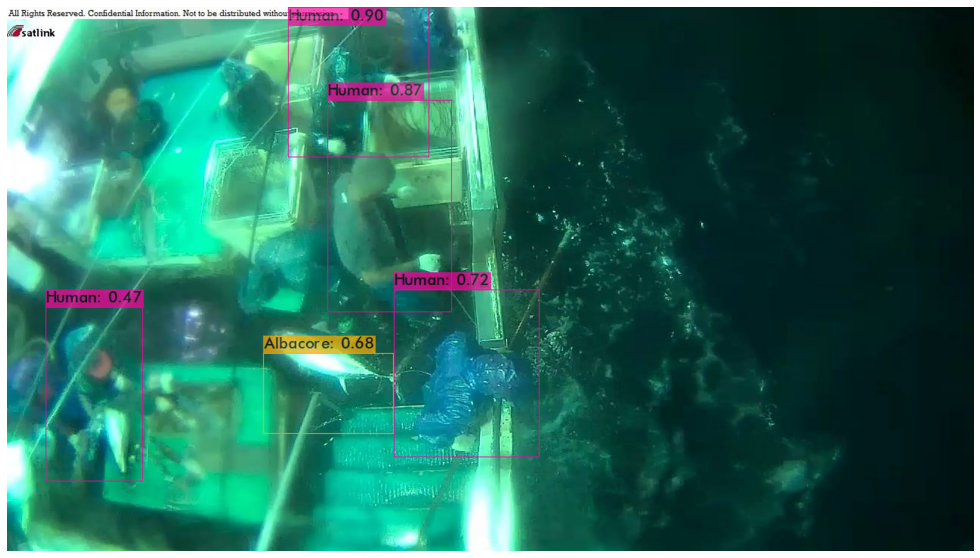

In [ ]:
!./darknet detector test cfg/cocomod2.data cfg/yolov3mod2.cfg /content/drive/MyDrive/YOLO/backup/yolov3mod2_final.weights data/test.jpg -dont_show 
imShow('predictions.jpg') #-thresh 0.6

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

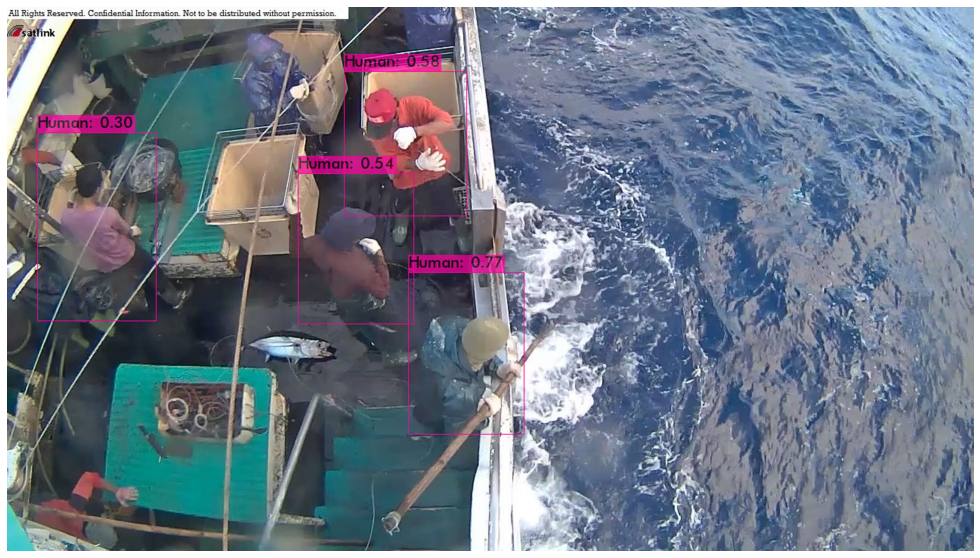

In [ ]:
!./darknet detector test cfg/cocomod2.data cfg/yolov3mod2.cfg /content/drive/MyDrive/YOLO/backup/yolov3mod2_last.weights data/train.jpg -dont_show
imShow('predictions.jpg')

# TEST UNTRAINED WEIGHTS

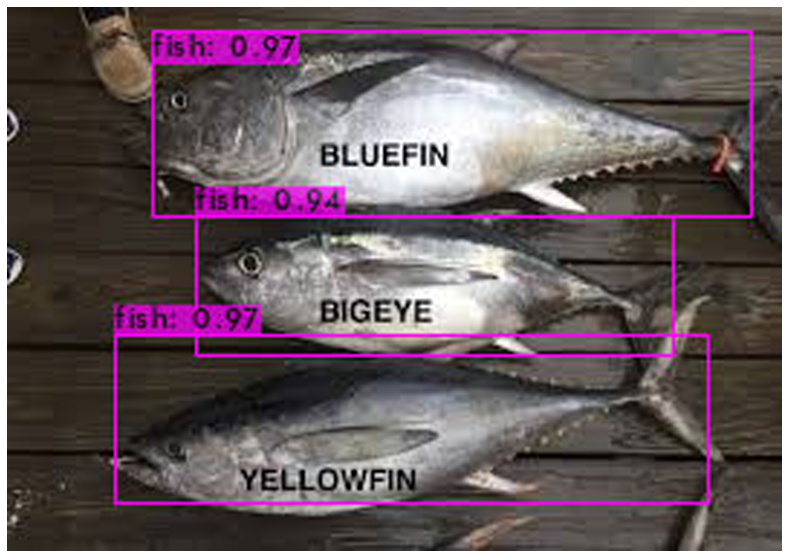

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/cocomod.data cfg/yolov3mod.cfg yolov3fish.weights data/tuna1.jpg -dont_show -thresh 0.5
# show image using our helper function
imShow('predictions.jpg')

# Training

In [ ]:
#%%capture
!./darknet detector train cfg/cocomod2.data cfg/yolov3mod33.cfg /content/darknet/yolov3fish.weights -dont_show -map -clear

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.598298), count: 8, class_loss = 14.749987, iou_loss = 1.529598, total_loss = 16.279585 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.341968), count: 1, class_loss = 1.875916, iou_loss = 0.615086, total_loss = 2.491002 
 total_bbox = 120497, rewritten_bbox = 0.157680 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.585470), count: 5, class_loss = 3.841688, iou_loss = 1.103237, total_loss = 4.944925 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.600813), count: 13, class_loss = 24.519424, iou_loss = 2.397821, total_loss = 26.917246 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.735460), count: 1, class_loss = 1.878523, iou_loss = 0.118226, total_loss = 1.996750 
 total_bbox = 120516, re

# EVALUATE MAP

In [ ]:
!./darknet detector map cfg/cocomod2.data cfg/yolov3mod2.cfg /content/drive/MyDrive/YOLO/backup/yolov3mod2_last.weights

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

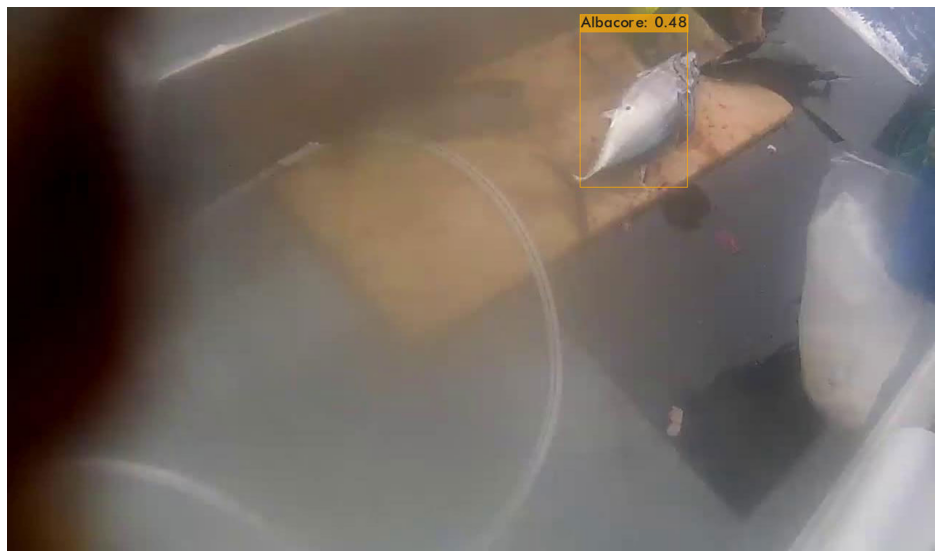

In [ ]:
!./darknet detector test cfg/cocomod2.data cfg/yolov3mod2.cfg /content/drive/MyDrive/YOLO/backup/yolov3mod2_last.weights /content/drive/MyDrive/YOLO/val/94eed41c-23f0-11e9-b0c4-6395d6c0e96b.jpg -dont_show
imShow('predictions.jpg')

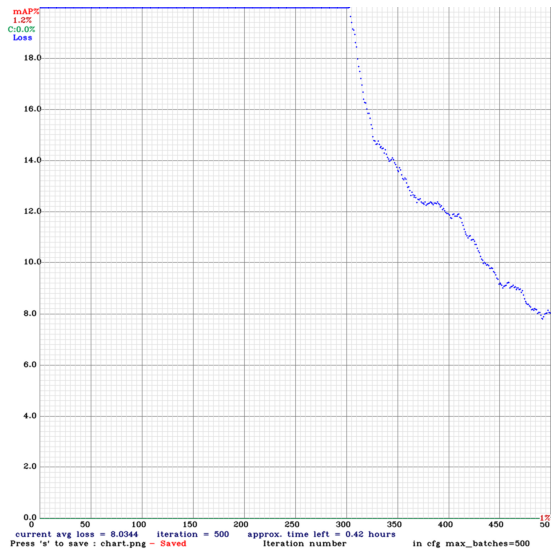

In [ ]:
imShow('chart.png')

# CUSTOM TEST CFG

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3mod3.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3mod3.cfg
%cd ..

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

## Save Results to .JSON/TXT

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -ext_output -dont_show -out result.json < /mydrive/images.txt

/bin/bash: /mydrive/images.txt: No such file or directory


In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show -ext_output < /mydrive/images.txt > result.txt


#FIX ANNOTATION







In [ ]:
def check(path):
  import sys
  import cv2
  from google.colab.patches import cv2_imshow as tip
  import os.path

#  if (len(sys.argv) !=2):
 #     print("Usage %s: path_to_image" % sys.argv[0])

  image_filename = path
  annotations_filename = image_filename[:-3]+"txt"

  if not os.path.exists(image_filename):
      print ("Error: Image file %s does not exist!" % image_filename)
      exit(-1)

  if not os.path.exists(annotations_filename):
      print ("Error: annotation file %s does not exist!" % annotations_filename)
      exit(-1)

  img = cv2.imread(image_filename)
  img_width = img.shape[1]
  img_height = img.shape[0]

  with open(annotations_filename) as f:
      lines = f.readlines()

  for l in lines:
      data = l.split(" ")
      print (data)
      cx1 = float(data[1])
      cy1 = float(data[2])
      #if cy1>1 : cy1=1/cy1
      w = float(data[3])
      h = float(data[4])
      x1 = int((cx1 - w/2)*img_width)
      y1 = int((cy1 - h/2)*img_height)
      x2 = int((cx1 + w/2)*img_width)
      y2 = int((cy1 + h/2)*img_height)
      print(x1,x2,y1,y2,h,img_height,w,img_width)
      cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0),2)
      
  return tip(img)

['23', '0.58515625', '0.9486111111111112', '0.171875', '0.09722222222222222\n']
639 859 648 718 0.09722222222222222 720 0.171875 1280
['23', '0.0984375', '0.3270833333333333', '0.196875', '0.3375\n']
0 252 113 356 0.3375 720 0.196875 1280
['9', '0.11171875', '0.5680555555555555', '0.0953125', '0.20555555555555555\n']
82 204 335 482 0.20555555555555555 720 0.0953125 1280
['9', '0.26328125', '0.22013888888888888', '0.2140625', '0.30972222222222223\n']
200 474 46 270 0.30972222222222223 720 0.2140625 1280
['9', '0.5453125', '0.33194444444444443', '0.3', '0.2111111111111111\n']
505 890 162 315 0.2111111111111111 720 0.3 1280
['9', '0.85390625', '0.40625', '0.1765625', '0.2763888888888889\n']
980 1206 193 392 0.2763888888888889 720 0.1765625 1280
['23', '0.915234375', '0.16666666666666666', '0.16796875', '0.3333333333333333\n']
1064 1279 0 240 0.3333333333333333 720 0.16796875 1280


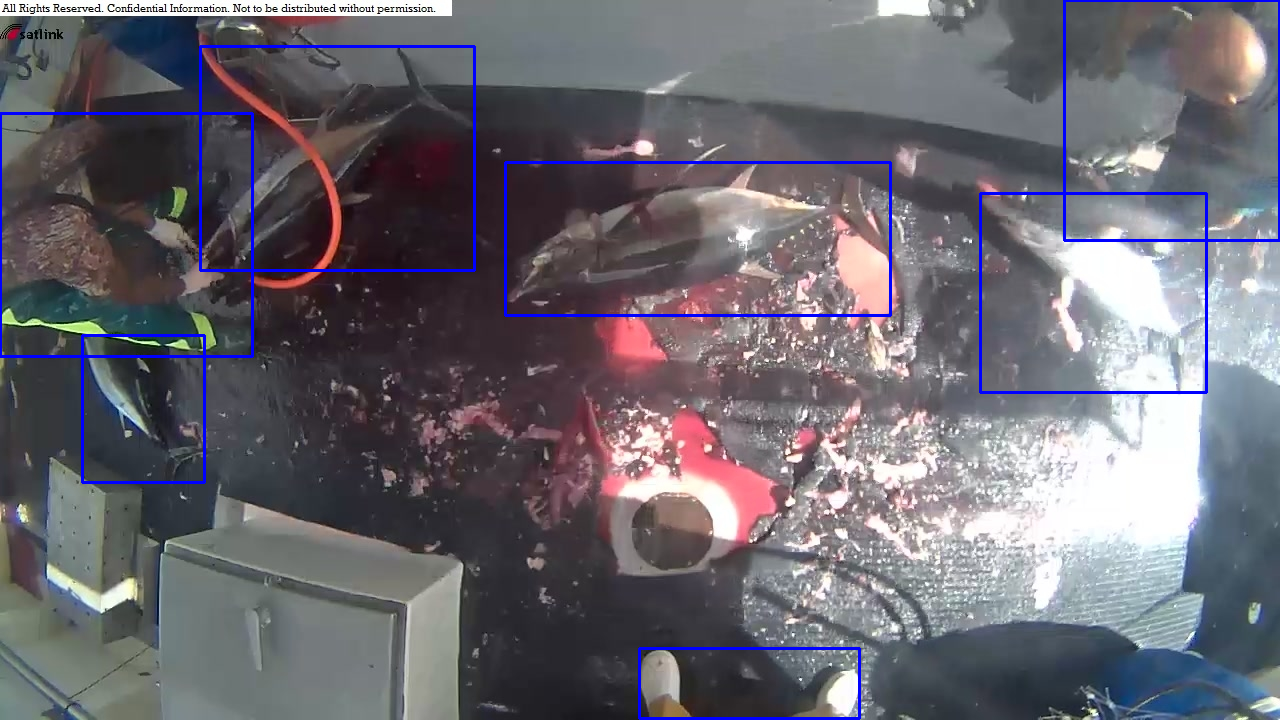

In [ ]:
check('/content/drive/MyDrive/YOLO/train/94b88d30-23f0-11e9-b611-3bd7f412fff0.jpg')

In [ ]:
import os
import pandas as pd
from tqdm import tqdm

directory = '/content/drive/MyDrive/YOLO/train'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"): 
        #print(os.path.join(directory, filename))
        df = pd.read_csv(os.path.join(directory, filename), sep=' ',names=[0,1,2,3,4])
        #print(df)
        if (df[df[2]>1].empty):continue
        df[2] = df[2].apply(lambda x: 1/x if x>1 else x)
        #print(df)
        df.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

In [ ]:
directory = '/content/drive/MyDrive/YOLO/val'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"): 
        #print(os.path.join(directory, filename))
        df = pd.read_csv(os.path.join(directory, filename), sep=' ',names=[0,1,2,3,4])
        if (df[df[2]>1].empty):continue
        #print(df)
        df[2] = df[2].apply(lambda x: 1/x if x>1 else x)
        #print(df)
        df.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

In [ ]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('/content/drive/MyDrive/YOLO/test/ofid_labels_bbox_v011.csv')
df.describe()

bbox_id          x_min         x_max          y_min          y_max
count  162926.000000  162926.000000  162926.00000  162926.000000  162926.000000
mean        4.104379     447.048261     644.21128     231.322435     413.379675
std         3.411613     276.605622     304.82055     203.918391     197.932480
min         1.000000     -15.000000       9.00000     -15.000000      16.000000
25%         2.000000     252.000000     443.00000      37.000000     243.000000
50%         3.000000     448.000000     618.00000     187.000000     414.000000
75%         5.000000     604.000000     824.00000     405.000000     581.000000
max        35.000000    1466.000000    1731.00000     909.000000     973.000000

In [ ]:
df.shape

(162926, 8)

In [ ]:
df[df['x_min']<0]

img_id  bbox_id  ...  label_l1  label_l2
613  94a6dedc-23f0-11e9-a826-1765a94abb78        1  ...   No fish       NoF
719  94a6f9f8-23f0-11e9-a879-e7a383be67a9        1  ...   No fish       NoF

[2 rows x 8 columns]

In [ ]:
df.drop(df[df['x_min']<0].index, inplace=True)

In [ ]:
df.describe(include='all')

img_id        bbox_id  ...  label_l1  label_l2
count                                 162924  162924.000000  ...    162924    162924
unique                                 35081            NaN  ...        27        12
top     94ae2fb6-23f0-11e9-ba88-17bbdef8237a            NaN  ...     Human     HUMAN
freq                                      25            NaN  ...    104436    104436
mean                                     NaN       4.104417  ...       NaN       NaN
std                                      NaN       3.411617  ...       NaN       NaN
min                                      NaN       1.000000  ...       NaN       NaN
25%                                      NaN       2.000000  ...       NaN       NaN
50%                                      NaN       3.000000  ...       NaN       NaN
75%                                      NaN       5.000000  ...       NaN       NaN
max                                      NaN      35.000000  ...       NaN       NaN

[11 rows x 8 columns]

In [ ]:
check('/content/drive/MyDrive/YOLO/train/94b88d30-23f0-11e9-b611-3bd7f412fff0.jpg')

In [ ]:
df[df['x_max']>1280].shape

(500, 8)

In [ ]:
labs=pd.read_csv('/content/drive/MyDrive/YOLO/test/labelling.csv')
labs.head()

img_id  bbox_id  ...         w         h
0  94a6a534-23f0-11e9-a793-c7e8fecc9fa8        1  ...  0.105469  0.225000
1  94a6a534-23f0-11e9-a793-c7e8fecc9fa8        2  ...  0.173437  0.183333
2  94a6a782-23f0-11e9-a79a-e7fb5b835158        1  ...  0.999219  0.998611
3  94a6aebc-23f0-11e9-a7b1-2bc5f95ba082        1  ...  0.153906  0.329167
4  94a6aebc-23f0-11e9-a7b1-2bc5f95ba082        2  ...  0.141406  0.206944

[5 rows x 15 columns]

In [ ]:
yoy=labs[labs['img_id']=='94ad4858-23f0-11e9-b833-0f9902649e32'][['label','cx','cy','w','h']]
yoy

label        cx        cy         w         h
4487     23  0.480469  0.696528  0.128125  0.245833
4488     19  0.341797  0.654167  0.150781  0.147222
4489     23  0.391406  0.421528  0.115625  0.312500
4490     23  0.299219  0.498611  0.123438  0.197222
4491     19  0.110547  0.790972  0.035156  0.126389
4492     23  0.044531  0.733333  0.089063  0.191667
4493     23  0.103516  0.640278  0.103906  0.136111
4494     23  0.358984  0.186806  0.094531  0.237500
4495     23  0.445703  0.060417  0.080469  0.120833
4496     23  0.267969  0.178472  0.096875  0.176389
4497     23  0.100000  0.201389  0.067187  0.169444

In [ ]:
directory = '/content/drive/MyDrive/YOLO/val'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"):
        temp=labs[labs['img_id']==filename[:-4]][['label','cx','cy','w','h']]
        temp.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue



  0%|          | 0/2154 [00:00<?, ?it/s]

  0%|          | 1/2154 [00:00<25:43,  1.39it/s]

  0%|          | 2/2154 [00:01<27:22,  1.31it/s]

  0%|          | 3/2154 [00:02<27:41,  1.29it/s]

  0%|          | 4/2154 [00:03<26:45,  1.34it/s]

  0%|          | 5/2154 [00:03<27:58,  1.28it/s]

  0%|          | 6/2154 [00:04<27:42,  1.29it/s]

  0%|          | 7/2154 [00:05<28:17,  1.26it/s]

  0%|          | 8/2154 [00:06<27:11,  1.31it/s]

  0%|          | 9/2154 [00:07<27:33,  1.30it/s]

  0%|          | 10/2154 [00:07<26:02,  1.37it/s]

  1%|          | 11/2154 [00:08<26:04,  1.37it/s]

  1%|          | 12/2154 [00:09<26:21,  1.35it/s]

  1%|          | 13/2154 [00:09<27:26,  1.30it/s]

  1%|          | 14/2154 [00:10<26:44,  1.33it/s]

  1%|          | 15/2154 [00:11<26:50,  1.33it/s]

  1%|          | 16/2154 [00:12<31:39,  1.13it/s]

  1%|          | 17/2154 [00:13<30:23,  1.17it/s]

  1%|          | 18/2154 [00:14<30:51,  1.15it/s]

  1%|          | 19/2154 [00:15<29:50,  1.19it/

In [ ]:
directory = '/content/drive/MyDrive/YOLO/train'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"):
        temp=labs[labs['img_id']==filename[:-4]][['label','cx','cy','w','h']]
        temp.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.

 29%|██▉       | 3433/11878 [33:19<1:14:37,  1.89it/s]

 29%|██▉       | 3434/11878 [33:20<1:14:54,  1.88it/s]

 29%|██▉       | 3435/11878 [33:20<1:15:17,  1.87it/s]

 29%|██▉       | 3436/11878 [33:21<1:16:44,  1.83it/s]

 29%|██▉       | 3437/11878 [33:21<1:16:21,  1.84it/s]

 29%|██▉       | 3438/11878 [33:22<1:18:44,  1.79it/s]

 29%|██▉       | 3439/11878 [33:23<1:17:28,  1.82it/s]

 29%|██▉       | 3440/11878 [33:23<1:15:35,  1.86it/s]

 29%|██▉       | 3441/11878 [33:24<1:18:22,  1.79it/s]

 29%|██▉       | 3442/11878 [33:24<1:21:59,  1.71it/s]

 29%|██▉       | 3443/11878 [33:25<1:18:23,  1.79it/s]

 29%|██▉       | 3444/11878 [33:25<1:17:52,  1.80it/s]

 29%|██▉       | 3445/11878 [33:26<1:16:39,  1.83it/s]

 29%|██▉       | 3446/11878 [33:26<1:18:52,  1.78it/s]

 29%|██▉       | 3447/11878 [33:27<1:18:00,  1.80it/s]

 29%|██▉       | 3448/11878 [33:28<1:16:21,  1.84it/s]

 29%|██▉       | 3449/118

In [ ]:
directory = '/content/drive/MyDrive/YOLO/train'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".jpg"): 
        #print(os.path.join(directory, filename))
        img = cv2.imread(os.path.join(directory, filename))
        img_width = img.shape[1]
        img_height = img.shape[0]
        print(img_height,img_width)
        df = pd.DataFrame([''])
        df.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

In [ ]:
import os
import pandas as pd
import cv2
from tqdm import tqdm

directory = '/content/drive/MyDrive/YOLO/train'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"): 
        #print(os.path.join(directory, filename))
        #temp = pd.read_csv(os.path.join(directory, filename), sep=' ',names=['label_enc','',2,3,4])
        #img = cv2.imread(os.path.join(directory, filename[:-3]+'jpg'))
        im = Image.open(os.path.join(directory, filename[:-3]+'jpg'))
        img_width = im.size[0]#img.shape[1]
        img_height = im.size[1]#img.shape[0]
        id=str(filename[:-4])
        #print(id,img_height,img_width)
        df.loc[df['img_id']==id,'image_width']=img_width
        df.loc[df['img_id']==id,'image_height']=img_height
        #print(df[df['img_id']==id])
        continue
    else:
        continue


 27%|██▋       | 3214/11878 [42:16<1:51:49,  1.29it/s]

KeyboardInterrupt: ignored

In [ ]:
df.image_height.describe()

count    3292.000000
mean      774.034326
std       102.578523
min       650.000000
25%       718.000000
50%       750.000000
75%       755.000000
max       979.000000
Name: image_height, dtype: float64

In [ ]:
df.image_width.value_counts()

1280.0    1631
1208.0     509
1200.0     434
1276.0     226
1244.0     205
1192.0     112
1732.0     104
1334.0      51
1520.0      16
1224.0       3
1156.0       1
Name: image_width, dtype: int64

In [ ]:
df['image_width']=np.nan
df['image_height']=np.nan

In [ ]:
tempo = df[df['img_id']=='94ad4858-23f0-11e9-b833-0f9902649e32']
tempo

img_id  bbox_id  ...         w         h
23059  94ad4858-23f0-11e9-b833-0f9902649e32        1  ...  0.128125  0.245833
23060  94ad4858-23f0-11e9-b833-0f9902649e32        2  ...  0.150781  0.147222
23061  94ad4858-23f0-11e9-b833-0f9902649e32        3  ...  0.115625  0.312500
23062  94ad4858-23f0-11e9-b833-0f9902649e32        4  ...  0.123438  0.197222
23063  94ad4858-23f0-11e9-b833-0f9902649e32        5  ...  0.035156  0.126389
23064  94ad4858-23f0-11e9-b833-0f9902649e32        6  ...  0.089063  0.191667
23065  94ad4858-23f0-11e9-b833-0f9902649e32        7  ...  0.103906  0.136111
23066  94ad4858-23f0-11e9-b833-0f9902649e32        8  ...  0.094531  0.237500
23067  94ad4858-23f0-11e9-b833-0f9902649e32        9  ...  0.080469  0.120833
23068  94ad4858-23f0-11e9-b833-0f9902649e32       10  ...  0.096875  0.176389
23069  94ad4858-23f0-11e9-b833-0f9902649e32       12  ...  0.067187  0.169444

[11 rows x 13 columns]

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
tempo['cx']=(tempo['x_max']+tempo['x_min'])/(2*img_width)
tempo['cy']=(tempo['y_max']+tempo['y_min'])/(2*img_height)
tempo['w']=(tempo['x_max']-tempo['x_min'])/img_width
tempo['h']=(tempo['y_max']-tempo['y_min'])/img_height
tempo

img_id  bbox_id  ...         w         h
23059  94ad4858-23f0-11e9-b833-0f9902649e32        1  ...  0.128125  0.245833
23060  94ad4858-23f0-11e9-b833-0f9902649e32        2  ...  0.150781  0.147222
23061  94ad4858-23f0-11e9-b833-0f9902649e32        3  ...  0.115625  0.312500
23062  94ad4858-23f0-11e9-b833-0f9902649e32        4  ...  0.123438  0.197222
23063  94ad4858-23f0-11e9-b833-0f9902649e32        5  ...  0.035156  0.126389
23064  94ad4858-23f0-11e9-b833-0f9902649e32        6  ...  0.089063  0.191667
23065  94ad4858-23f0-11e9-b833-0f9902649e32        7  ...  0.103906  0.136111
23066  94ad4858-23f0-11e9-b833-0f9902649e32        8  ...  0.094531  0.237500
23067  94ad4858-23f0-11e9-b833-0f9902649e32        9  ...  0.080469  0.120833
23068  94ad4858-23f0-11e9-b833-0f9902649e32       10  ...  0.096875  0.176389
23069  94ad4858-23f0-11e9-b833-0f9902649e32       12  ...  0.067187  0.169444

[11 rows x 12 columns]

In [ ]:
df['label_l1'].value_counts()

Human                      104436
Albacore                    33901
Unknown fish                 8175
Yellowfin tuna               6074
Bigeye tuna                  2963
No fish                      1910
Shark                        1251
Mahi mahi                    1110
Opah                         1090
Wahoo                         657
Long snouted lancetfish       311
Skipjack tuna                 203
Striped marlin                201
Black marlin                  130
Indo Pacific sailfish         122
Great barracuda                87
Shortbill spearfish            67
Swordfish                      63
Pelagic stingray               52
Sickle pomfret                 47
White margate                  32
Blue marlin                    17
Oilfish                        15
Marlin                          4
Lancetfish                      3
Rainbow runner                  2
Thresher shark                  1
Name: label_l1, dtype: int64

In [ ]:
class_labels=['Shortbill spearfish',
'Skipjack tuna',
'Thresher shark',
'Unknown fish',
'No fish',
'Rainbow runner',
'Striped marlin',
'Oilfish',
'Albacore',
'Wahoo',
'Lancetfish',
'Sickle pomfret',
'Opah',
'Great barracuda',
'Marlin',
'Yellowfin tuna',
'Indo Pacific sailfish',
'Swordfish',
'Bigeye tuna',
'Shark',
'Mahi mahi',
'Long snouted lancetfish',
'Human',
'Pelagic stingray',
'Black marlin',
'Blue marlin',
'White margate']

In [ ]:
class_labels.index('Human')

22

In [ ]:
tempo['label']=tempo['label_l1'].apply(lambda x:class_labels.index(x)+1)
tempo

img_id  bbox_id  ...         h  label
23059  94ad4858-23f0-11e9-b833-0f9902649e32        1  ...  0.245833     23
23060  94ad4858-23f0-11e9-b833-0f9902649e32        2  ...  0.147222     19
23061  94ad4858-23f0-11e9-b833-0f9902649e32        3  ...  0.312500     23
23062  94ad4858-23f0-11e9-b833-0f9902649e32        4  ...  0.197222     23
23063  94ad4858-23f0-11e9-b833-0f9902649e32        5  ...  0.126389     19
23064  94ad4858-23f0-11e9-b833-0f9902649e32        6  ...  0.191667     23
23065  94ad4858-23f0-11e9-b833-0f9902649e32        7  ...  0.136111     23
23066  94ad4858-23f0-11e9-b833-0f9902649e32        8  ...  0.237500     23
23067  94ad4858-23f0-11e9-b833-0f9902649e32        9  ...  0.120833     23
23068  94ad4858-23f0-11e9-b833-0f9902649e32       10  ...  0.176389     23
23069  94ad4858-23f0-11e9-b833-0f9902649e32       12  ...  0.169444     23

[11 rows x 13 columns]

In [ ]:
temp

0         1         2         3         4
0   23  0.480469  0.687500  0.128125  0.245833
1   19  0.341797  0.714583  0.150781  0.147222
2   23  0.391406  0.368056  0.115625  0.312500
3   23  0.299219  0.509722  0.123438  0.197222
4   19  0.110547  0.759028  0.035156  0.126389
5   23  0.044531  0.716667  0.089063  0.191667
6   23  0.103516  0.664583  0.103906  0.136111
7   23  0.358984  0.152083  0.094531  0.237500
8   23  0.445703  0.071528  0.080469  0.120833
9   23  0.267969  0.176389  0.096875  0.176389
10  23  0.100000  0.176389  0.067187  0.169444

In [ ]:
df['label']=df['label_l1'].apply(lambda x:class_labels.index(x)+1)
df['cx']=(df['x_max']+df['x_min'])/(2*img_width)
df['cy']=(df['y_max']+df['y_min'])/(2*img_height)
df['w']=(df['x_max']-df['x_min'])/img_width
df['h']=(df['y_max']-df['y_min'])/img_height

In [ ]:
df.head()

img_id  bbox_id  ...         w         h
0  94a69b66-23f0-11e9-a78e-2f2b7983ac0d        1  ...  0.071094  0.183333
1  94a6a3a4-23f0-11e9-a78f-ebd9c88ef3e8        1  ...  0.075000  0.181944
2  94a6a430-23f0-11e9-a790-2b5f72f1667a        1  ...  0.069531  0.183333
3  94a6a48a-23f0-11e9-a791-fb958b6ab6b3        1  ...  0.076563  0.213889
4  94a6a4da-23f0-11e9-a792-f320b734bd9b        1  ...  0.068750  0.212500

[5 rows x 13 columns]

In [ ]:
#df[df['cx']>1 | df['cy']>1]
import numpy as np

df[np.logical_or(df['cx']>1, df['cy']>1)]['label_l1'].value_counts()

Human             475
Albacore           28
Yellowfin tuna     26
Unknown fish       14
Mahi mahi          12
Shark              10
Bigeye tuna         6
Name: label_l1, dtype: int64

In [ ]:
df[np.logical_and(df['cx']<1, df['cy']<1)]['label_l1'].value_counts()

Human                      103957
Albacore                    33872
Unknown fish                 8161
Yellowfin tuna               6048
Bigeye tuna                  2957
No fish                      1910
Shark                        1241
Mahi mahi                    1098
Opah                         1090
Wahoo                         657
Long snouted lancetfish       311
Skipjack tuna                 203
Striped marlin                201
Black marlin                  130
Indo Pacific sailfish         122
Great barracuda                87
Shortbill spearfish            67
Swordfish                      63
Pelagic stingray               52
Sickle pomfret                 47
White margate                  32
Blue marlin                    17
Oilfish                        15
Marlin                          4
Lancetfish                      3
Rainbow runner                  2
Thresher shark                  1
Name: label_l1, dtype: int64

In [ ]:
directory = '/content/drive/MyDrive/YOLO/test/tester'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"): 
        #print(os.path.join(directory, filename))
        temp = pd.read_csv(os.path.join(directory, filename), sep=' ',names=['label_enc','',2,3,4])
        img = cv2.imread(os.path.join(directory, filename[:-3]+'jpg'))
        img_width = img.shape[1]
        img_height = img.shape[0]
        print(img_height,img_width)
        #if (df[df[2]>1].empty):continue
        #df[2] = df[2].apply(lambda x: 1/x if x>1 else x)
        #print(df)
        #df.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

100%|██████████| 2/2 [00:00<00:00, 76.50it/s]

720 1280


In [ ]:
import os
import pandas as pd
from tqdm import tqdm

directory = '/content/drive/MyDrive/YOLO/val'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"): 
        df = pd.read_csv(os.path.join(directory, filename), sep=' ',names=[0,1,2,3,4])
        df[0]=df[0]-1
        #print(df)
        df.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

100%|██████████| 2154/2154 [10:45<00:00,  3.34it/s]


In [ ]:
directory = '/content/drive/MyDrive/YOLO/train'
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".txt"): 
        df = pd.read_csv(os.path.join(directory, filename), sep=' ',names=[0,1,2,3,4])
        df[0]=df[0]-1
        #print(df)
        df.to_csv(os.path.join(directory, filename), header=None, index=None, sep=' ', mode='w')
        continue
    else:
        continue

100%|██████████| 11878/11878 [40:01<00:00,  4.95it/s]


# UNDYING COLAB F12

In [ ]:
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)